In [1]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from seaborn import * 
import statsmodels.api as sm
from sklearn import metrics

In [3]:
data = read_csv("delivery_time.csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
#Define x and y
x = data['Sorting Time']
y = data['Delivery Time']

In [8]:
#Scatterplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'delivery time')

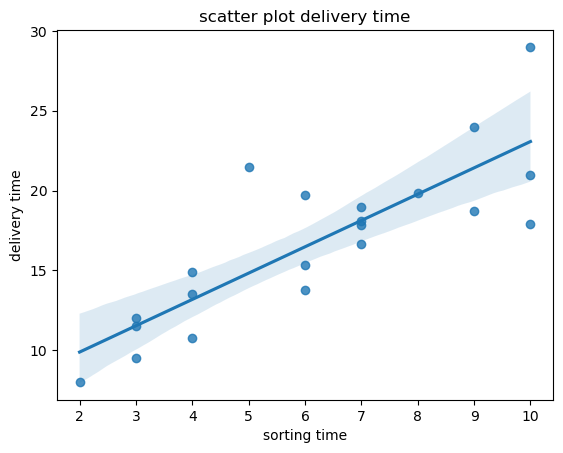

In [9]:
regplot(x, y )
title("scatter plot delivery time")
xlabel("sorting time")
ylabel("delivery time")

In [10]:
#check for outliers in both columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Delivery time')

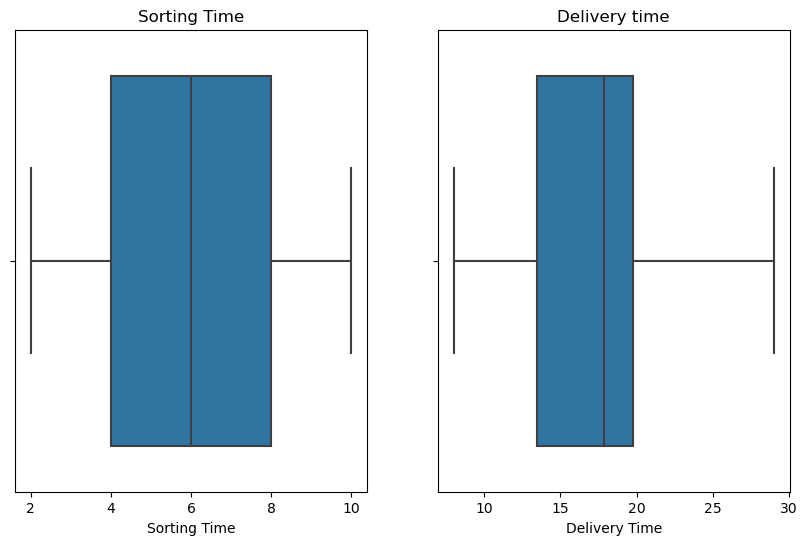

In [11]:
subplots(figsize = (10,6))
subplot(1,2,1)
boxplot(data['Sorting Time'])
title('Sorting Time')
subplot(1,2,2)
boxplot(data['Delivery Time'])
title('Delivery time')

In [12]:
#Lets check the co-relation

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

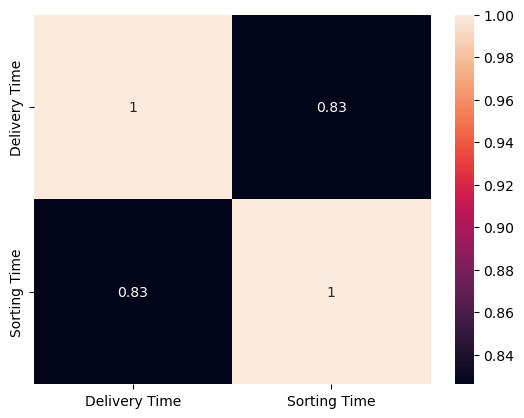

In [14]:
heatmap(data.corr(),annot=True)

In [15]:
#lets fit the model with no transformation

In [16]:
model1 = sm.OLS(y,x).fit()
pred1 = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                    6.12e-15
Time:                        17:28:42   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred1)))

RMSE: 3.713386295436734


In [18]:
#We need less AIC and BIC score for best fit model and also we need r2 score very good.
#And also we need minimum RMSE

In [19]:
#Square Root transformation on data

In [20]:
model2 = sm.OLS(sqrt(y),sqrt(x)).fit()
pred2 = sqrt(model2.predict(x))
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                    2.10e-20
Time:                        17:28:42   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred2)))

RMSE: 14.372730668293437


In [22]:
#Log transformation on Data

In [23]:
model3=sm.OLS(log(y),log(x)).fit()
pred3=log(model3.predict(x))
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                    5.72e-17
Time:                        17:28:42   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred3)))

RMSE: 15.33068110297254


In [25]:
##Lets compare their RMSE values

In [26]:
RMSE_table =DataFrame({'model1':sqrt(metrics.mean_squared_error(y, pred1)),
             'model2':sqrt(metrics.mean_squared_error(y, pred2)),
             'model3':sqrt(metrics.mean_squared_error(y, pred3))},index =[1])

In [27]:
RMSE_table

,model1,model2,model3
1,3.713386,14.372731,15.330681


In [28]:
#According to the above table and AIC and BIC values we conclude that the model1 is best .  

In [29]:
pred1 = DataFrame(pred1,columns=['predicted Delivery Time'])

In [30]:
prediction = concat([data,pred1],axis=1)

In [31]:
prediction

,Delivery Time,Sorting Time,predicted Delivery Time
0,21.00,10,25.652463
1,13.50,4,10.260985
2,19.75,6,15.391478
3,24.00,9,23.087216
4,29.00,10,25.652463
5,15.35,6,15.391478
6,19.00,7,17.956724
7,9.50,3,7.695739
8,17.90,10,25.652463
9,18.75,9,23.087216


In [32]:
#According to the above code we conclude that the model1 is best among 3 models.